In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Rainfall dataset.csv')

# Display the first few rows
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80,26.3,yes
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50,15.3,yes
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40,14.2,yes
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50,16.9,yes
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40,13.7,yes


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(366, 12)

In [ ]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.748634,21.512568
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.742678,10.066753
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.625000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.825000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0        day       366 non-null    int64  
 1    pressure      366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   sunshine       366 non-null    float64
 9   winddirection  366 non-null    int64  
 10  windspeed      366 non-null    float64
 11  rainfall       366 non-null    object 
dtypes: float64(7), int64(4), object(1)
memory usage: 34.4+ KB


In [ ]:
df["rainfall"].describe()

,rainfall
count,366
unique,2
top,yes
freq,249


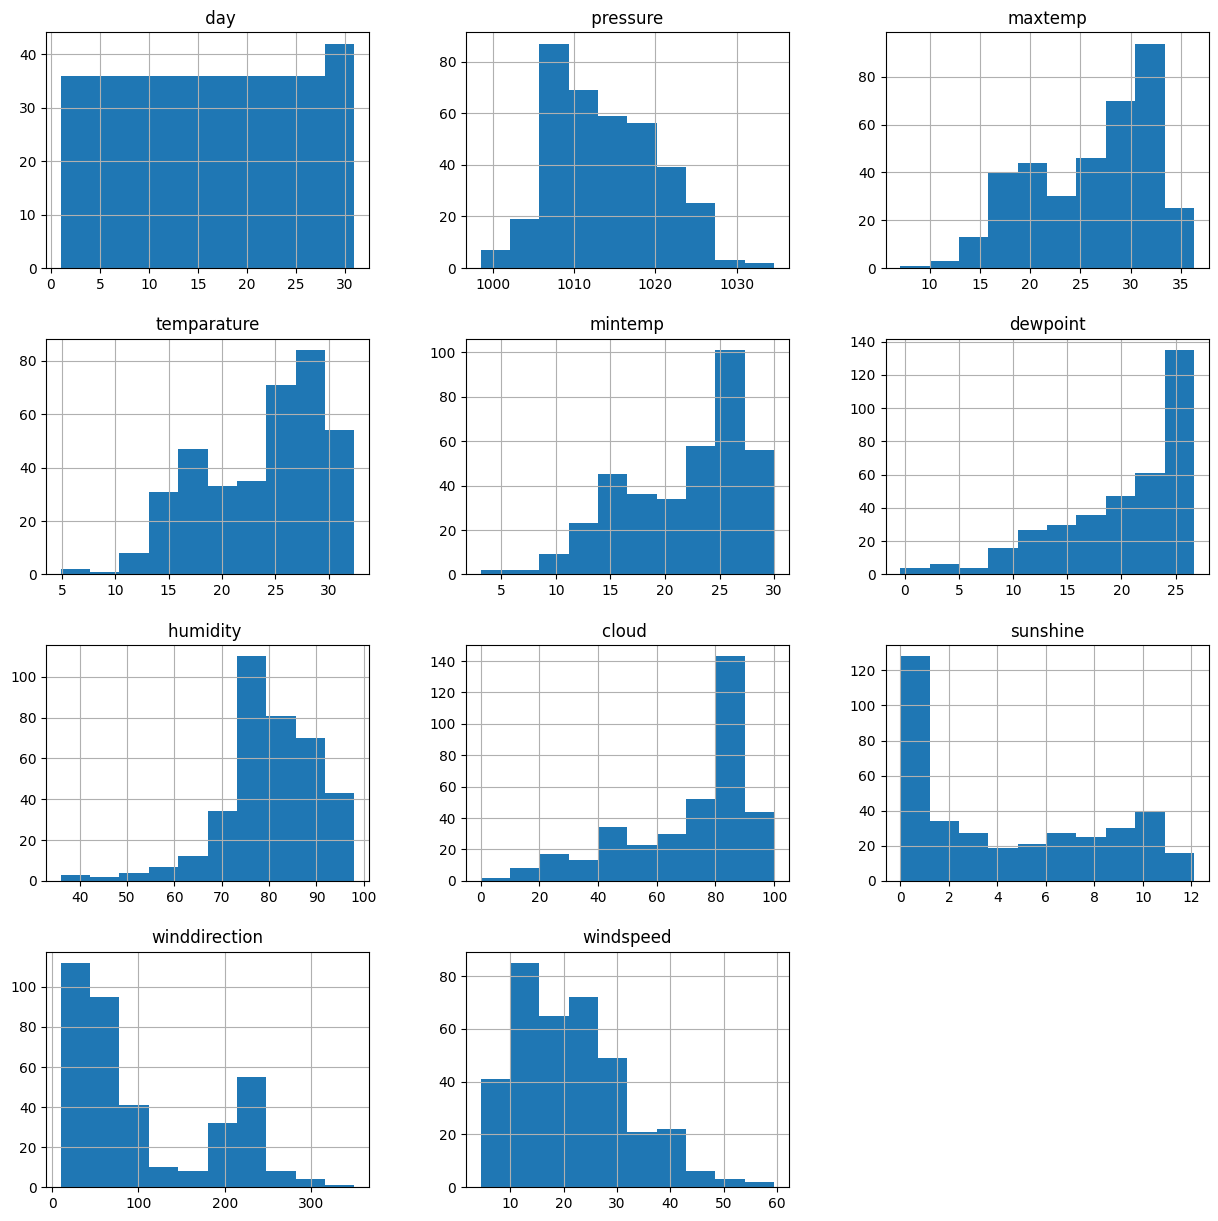

In [ ]:
df.hist(figsize=(15,15))
plt.show()

rainfall
yes    249
no     117
Name: count, dtype: int64


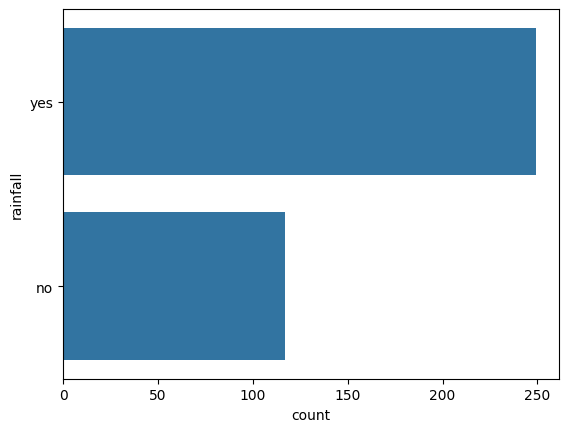

In [ ]:
y = df["rainfall"]
sns.countplot(y)
target_temp = df.rainfall.value_counts()
print(target_temp)

<Axes: xlabel='     day', ylabel='rainfall'>

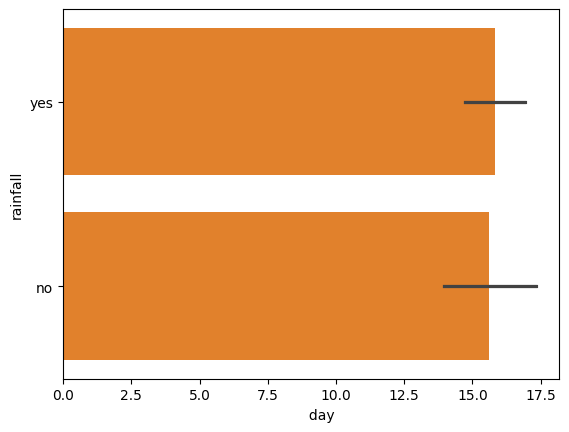

In [ ]:
df["     day"].unique()
sns.barplot(x=df["     day"], y=y)
sns.barplot(x="     day", y="rainfall", data=df)

<Axes: xlabel=' pressure ', ylabel='rainfall'>

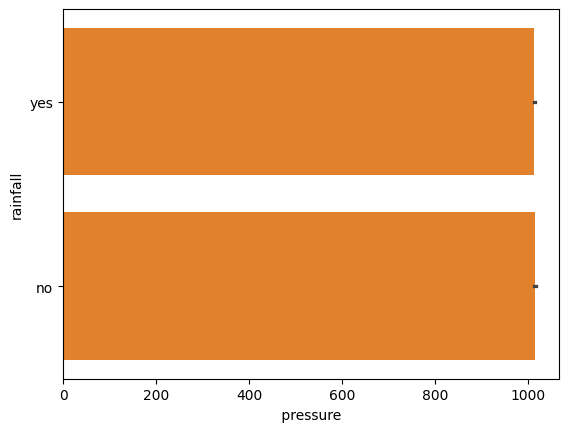

In [ ]:
df[" pressure "].unique()
sns.barplot(x=df[" pressure "], y=y)
sns.barplot(x=" pressure ", y="rainfall", data=df)

<Axes: xlabel='maxtemp', ylabel='rainfall'>

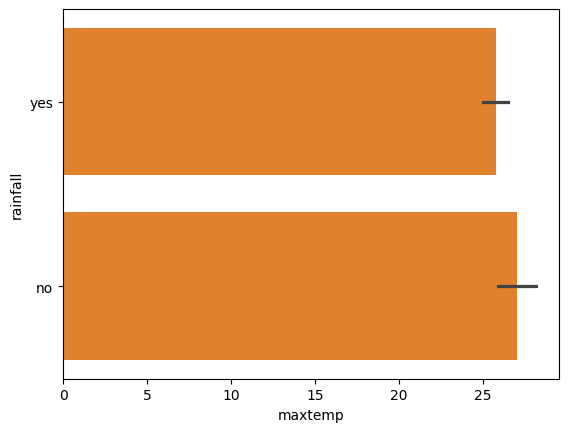

In [ ]:
df["maxtemp"].unique()
sns.barplot(x=df["maxtemp"], y=y)
sns.barplot(x="maxtemp", y="rainfall", data=df)

<Axes: xlabel='temparature', ylabel='rainfall'>

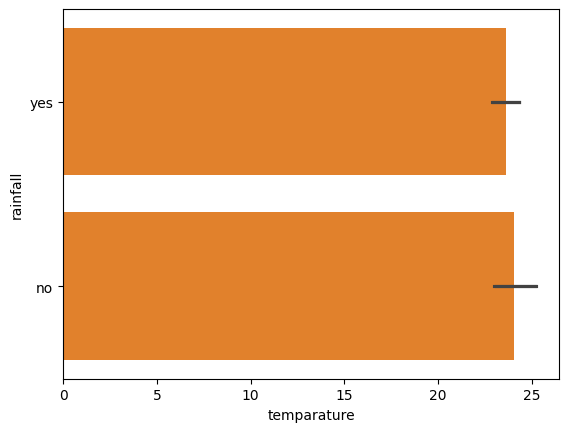

In [ ]:
df["temparature"].unique()
sns.barplot(x=df["temparature"], y=y)
sns.barplot(x="temparature", y="rainfall", data=df)

<Axes: xlabel='mintemp', ylabel='rainfall'>

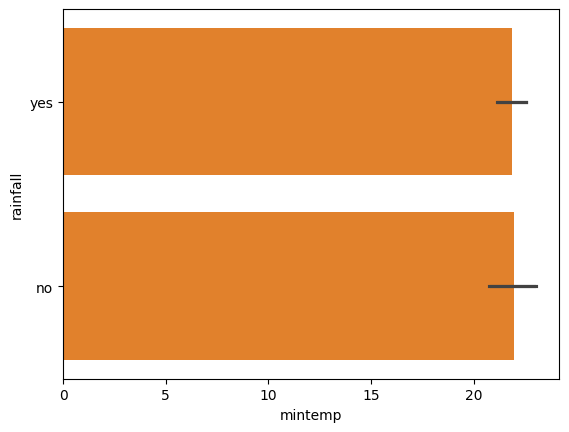

In [ ]:
df["mintemp"].unique()
sns.barplot(x=df["mintemp"], y=y)
sns.barplot(x="mintemp", y="rainfall", data=df)

<Axes: xlabel='dewpoint', ylabel='rainfall'>

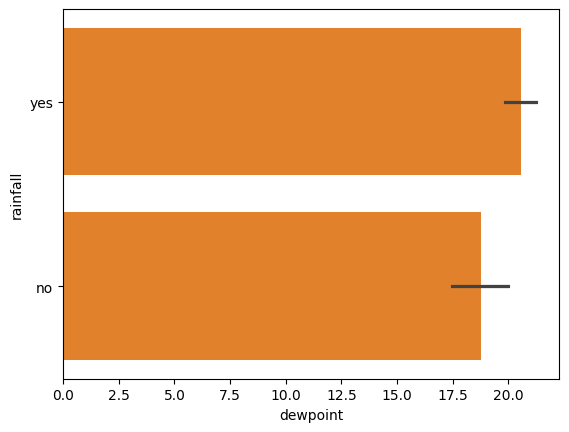

In [ ]:
df["dewpoint"].unique()
sns.barplot(x=df["dewpoint"], y=y)
sns.barplot(x="dewpoint", y="rainfall", data=df)

<Axes: xlabel='humidity ', ylabel='rainfall'>

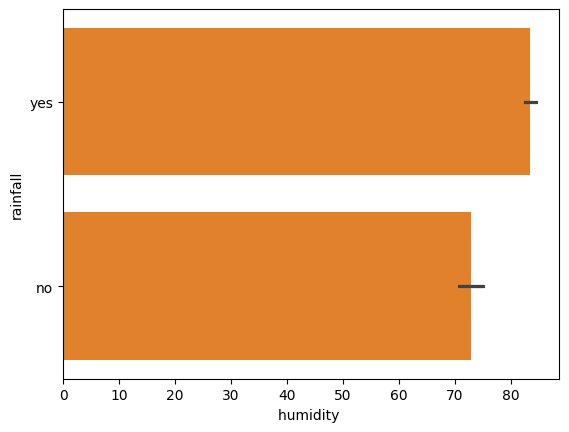

In [ ]:
df["humidity "].unique()
sns.barplot(x=df["humidity "], y=y)
sns.barplot(x="humidity ", y="rainfall", data=df)

<Axes: xlabel='cloud ', ylabel='rainfall'>

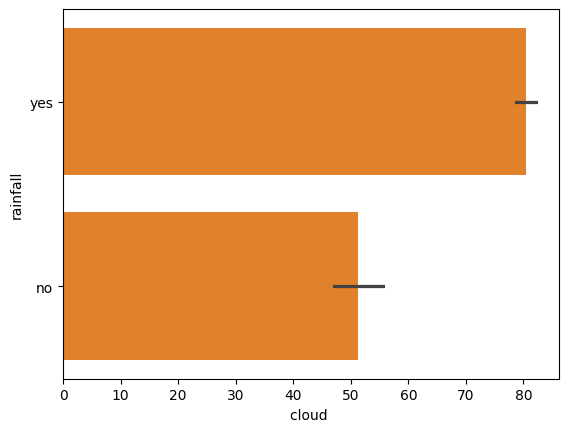

In [ ]:
df["cloud "].unique()
sns.barplot(x=df["cloud "], y=y)
sns.barplot(x="cloud ", y="rainfall", data=df)

<Axes: xlabel='sunshine', ylabel='rainfall'>

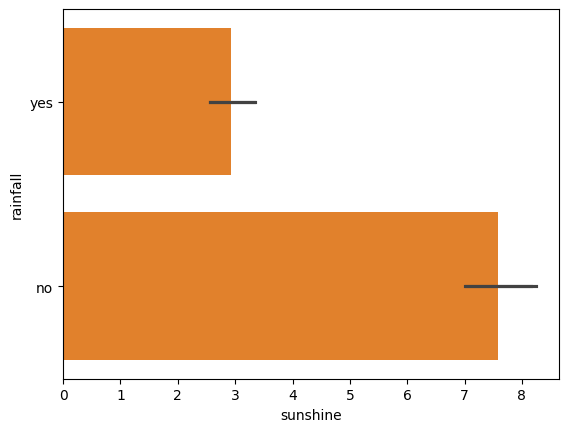

In [ ]:
df["sunshine"].unique()
sns.barplot(x=df["sunshine"], y=y)
sns.barplot(x="sunshine", y="rainfall", data=df)

<Axes: xlabel='winddirection', ylabel='rainfall'>

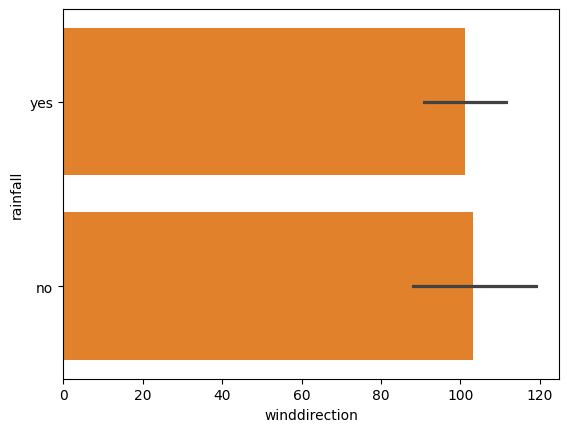

In [ ]:
df["winddirection"].unique()
sns.barplot(x=df["winddirection"], y=y)
sns.barplot(x="winddirection", y="rainfall", data=df)

<Axes: xlabel='windspeed', ylabel='rainfall'>

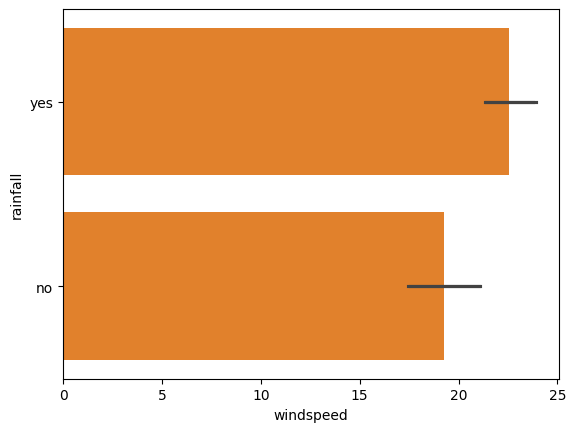

In [ ]:
df["windspeed"].unique()
sns.barplot(x=df["windspeed"], y=y)
sns.barplot(x="windspeed", y="rainfall", data=df)

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Check for missing values in the dataset
print(df.isnull().sum())

# Handle missing values for numeric columns only
# 1. Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# 2. Create a new DataFrame with only numeric columns
df_numeric = df[numeric_cols]

# 3. Apply SimpleImputer to the numeric DataFrame
imputer = SimpleImputer(strategy='mean')
df_imputed_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# 4. Concatenate imputed numeric columns with original non-numeric columns
df_imputed = pd.concat([df_imputed_numeric, df.drop(columns=numeric_cols)], axis=1)

# Encode categorical variables (if any)
# Check if the column 'rainfall' exists before encoding
if 'rainfall' in df_imputed.columns:
  encoder = LabelEncoder()
  df_imputed['rainfall'] = encoder.fit_transform(df_imputed['rainfall'])

# Feature scaling
scaler = StandardScaler()

# Apply scaling to numeric features only
df_scaled_numeric = pd.DataFrame(scaler.fit_transform(df_imputed_numeric), columns=df_imputed_numeric.columns)

# Concatenate scaled numeric features with original non-numeric features
df_scaled = pd.concat([df_scaled_numeric, df_imputed.drop(columns=numeric_cols)], axis=1)

# Check the processed data
df_scaled.head()


     day         0
 pressure        0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,-1.674718,1.897809,-1.053782,-0.968384,-0.911936,-1.150321,-0.813795,-1.016547,1.242193,-0.266426,0.476220,1
1,-1.561231,1.289005,-0.752283,-0.861719,-0.840335,-0.732877,0.081842,0.545363,-0.972100,-0.633934,-0.617982,1
2,-1.447743,0.929967,-0.986782,-0.790610,-0.697133,-0.265339,1.475055,0.912872,-1.124810,-0.756437,-0.727402,1
3,-1.334255,0.805085,-0.651783,-0.559503,-0.500230,-0.198548,0.977479,0.775056,-0.870293,-0.633934,-0.458825,1
4,-1.220768,0.336774,-0.819283,-0.541726,-0.303327,-0.014873,1.475055,0.453486,-1.124810,-0.756437,-0.777139,1


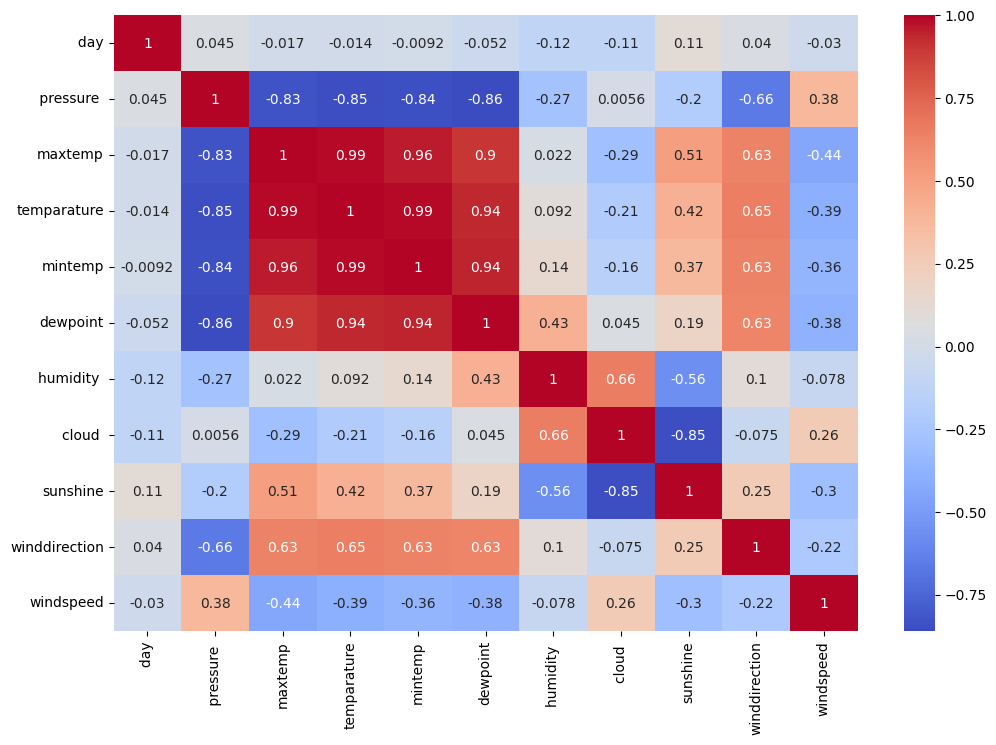

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import numpy if not already imported

# Compute correlation matrix
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Assuming 'rainfall' is your target variable
y = df['rainfall']  # Define y as the 'rainfall' column from your DataFrame

# Encode target variable if necessary
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define X with your feature columns
# Select all columns except 'rainfall' as features
X = df.drop('rainfall', axis=1)

# If you have non-numeric features in X, you need to encode them as well
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Impute missing values using SimpleImputer before applying chi2
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
X_imputed = imputer.fit_transform(X)  # Impute missing values in X

# Use MinMaxScaler to scale features to a non-negative range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply chi2 to compute chi-squared stats and p-values
chi_scores = chi2(X_scaled, y_encoded)
p_values = chi_scores[1]

# Print p-values of features
print("P-values of features:", p_values)


P-values of features: [9.33985106e-01 6.40918365e-01 6.25126491e-01 8.59824479e-01
 9.70815219e-01 4.95257862e-01 7.20942270e-02 2.00178347e-03
 1.35220191e-08 9.21435990e-01 3.39319858e-01]


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use RandomForestClassifier or any other model
model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)

print("Selected features:", rfe.support_)
print("Ranking of features:", rfe.ranking_)


Selected features: [ True  True  True  True  True  True  True  True  True False  True]
Ranking of features: [1 1 1 1 1 1 1 1 1 2 1]


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming 'rainfall' is your target variable and df is your DataFrame
y = df['rainfall']

# Define X with your feature columns
X = df.drop('rainfall', axis=1)

# Handle missing values:
# 1. Impute missing values in X using SimpleImputer separately for numeric and categorical features
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

# Impute numeric features with mean (only if numeric features exist)
if not numeric_features.empty:
    imputer_numeric = SimpleImputer(strategy='mean')
    X_imputed_numeric = pd.DataFrame(imputer_numeric.fit_transform(X[numeric_features]), columns=numeric_features)
else:
    X_imputed_numeric = pd.DataFrame()  # Create an empty DataFrame if no numeric features exist

# Impute categorical features with most frequent value (only if categorical features exist)
if not categorical_features.empty:
    X[categorical_features] = X[categorical_features].astype(str)  # Ensure they are treated as strings
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    X_imputed_categorical = pd.DataFrame(imputer_categorical.fit_transform(X[categorical_features]), columns=categorical_features)
else:
    X_imputed_categorical = pd.DataFrame()  # Create an empty DataFrame if no categorical features exist

# Combine imputed numeric and categorical features
if not X_imputed_numeric.empty and not X_imputed_categorical.empty:
    X_imputed = pd.concat([X_imputed_numeric, X_imputed_categorical], axis=1)
elif not X_imputed_numeric.empty:
    X_imputed = X_imputed_numeric
else:
    X_imputed = X_imputed_categorical

# 2. Encode categorical features in X_imputed using LabelEncoder (only if categorical features exist)
for col in X_imputed.select_dtypes(include=['object']).columns:
    X_imputed[col] = LabelEncoder().fit_transform(X_imputed[col])

# Now use the imputed and encoded data (X_imputed) with SequentialFeatureSelector:
model = SVC(kernel='linear')
sfs = SequentialFeatureSelector(model, n_features_to_select=5)
X_sfs = sfs.fit_transform(X_imputed, y)  # Pass X_imputed here

print("Selected features:", sfs.get_support())


Selected features: [ True  True  True False False False  True  True False False False]


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd  # Import pandas for DataFrame operations

# ... (Your previous code for encoding and imputation) ...

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed) # Assuming X_imputed is defined in previous cells

# Now use the encoded, imputed, and scaled data (X_scaled) with Lasso, and the encoded target (y_encoded):
lasso = Lasso(alpha=0.01)  # You can adjust alpha here
lasso.fit(X_scaled, y_encoded)

# 1. Print coefficients with feature names:
feature_names = X.columns  # Get the original feature names
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

# 2. Explore non-zero coefficients:
non_zero_coefs = coefficients[coefficients['Coefficient'] != 0]
print("\nNon-zero coefficients:")
print(non_zero_coefs)

# 3. Consider a threshold for feature selection:
threshold = 0.1  # Adjust this threshold as needed
important_features = coefficients[abs(coefficients['Coefficient']) > threshold]
print("\nImportant features (threshold =", threshold, "):")
print(important_features)

          Feature  Coefficient
7          cloud      0.201788
5        dewpoint     0.053140
0             day     0.031776
6       humidity      0.028546
10      windspeed     0.011556
1       pressure     -0.000000
2         maxtemp     0.000000
3     temparature     0.000000
4         mintemp     0.000000
9   winddirection    -0.000000
8        sunshine    -0.070237

Non-zero coefficients:
      Feature  Coefficient
0         day     0.031776
5    dewpoint     0.053140
6   humidity      0.028546
7      cloud      0.201788
8    sunshine    -0.070237
10  windspeed     0.011556

Important features (threshold = 0.1 ):
  Feature  Coefficient
7  cloud      0.201788


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Assuming 'rainfall' is your target variable and df is your DataFrame
y = df['rainfall'].dropna()  # Drop any missing values in the target

# Define X with your feature columns (excluding 'rainfall')
X = df.drop('rainfall', axis=1)

# Align X with y (remove rows with missing values)
X = X.loc[y.index]  # Keep only rows in X that correspond to non-missing y

# Handle missing values:
# 1. Impute missing values in X using SimpleImputer separately for numeric and categorical features
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

# Impute numeric features with mean (if numeric features exist)
if not numeric_features.empty:
    imputer_numeric = SimpleImputer(strategy='mean')
    X_imputed_numeric = pd.DataFrame(imputer_numeric.fit_transform(X[numeric_features]), columns=numeric_features)
else:
    X_imputed_numeric = pd.DataFrame()

# Impute categorical features with most frequent value (if categorical features exist)
if not categorical_features.empty:
    X[categorical_features] = X[categorical_features].astype(str)  # Ensure they are treated as strings
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    X_imputed_categorical = pd.DataFrame(imputer_categorical.fit_transform(X[categorical_features]), columns=categorical_features)
else:
    X_imputed_categorical = pd.DataFrame()

# Combine imputed numeric and categorical features
if not X_imputed_numeric.empty and not X_imputed_categorical.empty:
    X_imputed = pd.concat([X_imputed_numeric, X_imputed_categorical], axis=1)
elif not X_imputed_numeric.empty:
    X_imputed = X_imputed_numeric
else:
    X_imputed = X_imputed_categorical

# One-hot encode categorical features in X_imputed
X_encoded = pd.get_dummies(X_imputed, drop_first=True)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)  # Use the encoded data for scaling

# Encode the target variable 'y' using LabelEncoder
# This converts 'yes' and 'no' (or other string values) to 0 and 1
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Now use the scaled data (X_scaled) with Lasso and the encoded target variable (y_encoded):
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed

# Check the shapes of X_scaled and y_encoded before fitting
print(f"Shape of X_scaled: {X_scaled.shape}")
print(f"Shape of y_encoded: {y_encoded.shape}")

# Fit the Lasso model using the encoded target variable
lasso.fit(X_scaled, y_encoded)

# 1. Print coefficients with feature names:
feature_names = X_encoded.columns  # Get the original feature names from the encoded DataFrame
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

# 2. Explore non-zero coefficients:
non_zero_coefs = coefficients[coefficients['Coefficient'] != 0]
print("\nNon-zero coefficients:")
print(non_zero_coefs)

# 3. Consider a threshold for feature selection:
threshold = 0.1  # Adjust this threshold as needed
important_features = coefficients[abs(coefficients['Coefficient']) > threshold]
print("\nImportant features (threshold =", threshold, "):")

Shape of X_scaled: (366, 11)
Shape of y_encoded: (366,)
          Feature  Coefficient
7          cloud      0.201788
5        dewpoint     0.053140
0             day     0.031776
6       humidity      0.028546
10      windspeed     0.011556
1       pressure     -0.000000
2         maxtemp     0.000000
3     temparature     0.000000
4         mintemp     0.000000
9   winddirection    -0.000000
8        sunshine    -0.070237

Non-zero coefficients:
      Feature  Coefficient
0         day     0.031776
5    dewpoint     0.053140
6   humidity      0.028546
7      cloud      0.201788
8    sunshine    -0.070237
10  windspeed     0.011556

Important features (threshold = 0.1 ):


In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
import numpy as np


# Assuming you have a CSV file named 'your_data.csv'
# Replace 'your_data.csv' with the actual path to your data file
df = pd.read_csv('/content/Rainfall dataset.csv')  # Load your data into a DataFrame named 'df'


# Assuming 'df' is your DataFrame and 'rainfall' is your target variable:
y = df['rainfall']  # Define y here using your DataFrame 'df'

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define X with your feature columns (excluding 'rainfall')
X = df.drop('rainfall', axis=1)

# Align X with y (remove rows with missing values)
X = X.loc[y.index]  # Keep only rows in X that correspond to non-missing y

# Handle missing values:
# 1. Impute missing values in X using SimpleImputer separately for numeric and categorical features
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

# Impute numeric features with mean (if numeric features exist)
if not numeric_features.empty:
    imputer_numeric = SimpleImputer(strategy='mean')
    X_imputed_numeric = pd.DataFrame(imputer_numeric.fit_transform(X[numeric_features]), columns=numeric_features)
else:
    X_imputed_numeric = pd.DataFrame()

# Impute categorical features with most frequent value (if categorical features exist)
if not categorical_features.empty:
    X[categorical_features] = X[categorical_features].astype(str)  # Ensure they are treated as strings
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    X_imputed_categorical = pd.DataFrame(imputer_categorical.fit_transform(X[categorical_features]), columns=categorical_features)
else:
    X_imputed_categorical = pd.DataFrame()

# Combine imputed numeric and categorical features
if not X_imputed_numeric.empty and not X_imputed_categorical.empty:
    X_imputed = pd.concat([X_imputed_numeric, X_imputed_categorical], axis=1)
elif not X_imputed_numeric.empty:
    X_imputed = X_imputed_numeric
else:
    X_imputed = X_imputed_categorical

# One-hot encode categorical features in X_imputed
X_encoded = pd.get_dummies(X_imputed, drop_first=True)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)  # Use the encoded data for scaling


k_best = 5  # Select top 5 features
anova_selector = SelectKBest(f_classif, k=k_best)
X_anova = anova_selector.fit_transform(X_scaled, y_encoded)

# Get selected features based on ANOVA F-Test (indices)
anova_selected_features = anova_selector.get_support(indices=True)
# Make sure X is defined and has the same columns as used in X_scaled
# For example, if you used X_encoded to create X_scaled, then use X_encoded.columns here
anova_selected_feature_names = X_encoded.columns[anova_selected_features]

# Print results
print(f"ANOVA selected features: {anova_selected_feature_names}")

ANOVA selected features: Index(['dewpoint', 'humidity ', 'cloud ', 'sunshine', 'windspeed'], dtype='object')


In [ ]:
# prompt: split the data into traing and testing

from sklearn.model_selection import train_test_split

# Assuming X_anova contains the selected features and y_encoded contains the labels
X_train, X_test, y_train, y_test = train_test_split(X_anova, y_encoded, test_size=0.2, random_state=42) # Adjust test_size as needed

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (292, 5)
X_test shape: (74, 5)
y_train shape: (292,)
y_test shape: (74,)


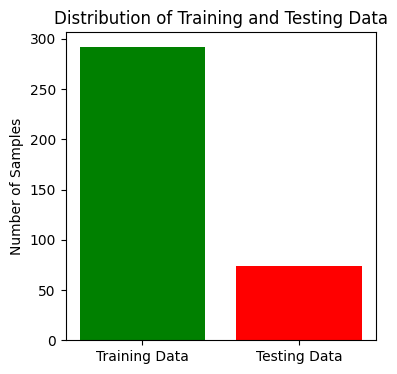

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module and assign it the alias 'plt'

plt.figure(figsize=(4, 4))
plt.bar(['Training Data', 'Testing Data'], [len(X_train), len(X_test)], color=['green', 'red'])
plt.title('Distribution of Training and Testing Data')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
!pip install imblearn
import pandas as pd
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn to use heatmap


# Assuming you have a CSV file named 'your_data.csv'
# Replace 'your_data.csv' with the actual path to your data file
df = pd.read_csv('/content/Rainfall dataset.csv')  # Load your data into a DataFrame named 'df'


# Assuming 'df' is your DataFrame and 'rainfall' is your target variable:
y = df['rainfall']  # Define y here using your DataFrame 'df'

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define X with your feature columns (excluding 'rainfall')
X = df.drop('rainfall', axis=1)

# Align X with y (remove rows with missing values)
X = X.loc[y.index]  # Keep only rows in X that correspond to non-missing y

# Handle missing values:
# 1. Impute missing values in X using SimpleImputer separately for numeric and categorical features
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

# Impute numeric features with mean (if numeric features exist)
if not numeric_features.empty:
    imputer_numeric = SimpleImputer(strategy='mean')
    X_imputed_numeric = pd.DataFrame(imputer_numeric.fit_transform(X[numeric_features]), columns=numeric_features)
else:
    X_imputed_numeric = pd.DataFrame()

# Impute categorical features with most frequent value (if categorical features exist)
if not categorical_features.empty:
    X[categorical_features] = X[categorical_features].astype(str)  # Ensure they are treated as strings
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    X_imputed_categorical = pd.DataFrame(imputer_categorical.fit_transform(X[categorical_features]), columns=categorical_features)
else:
    X_imputed_categorical = pd.DataFrame()

# Combine imputed numeric and categorical features
if not X_imputed_numeric.empty and not X_imputed_categorical.empty:
    X_imputed = pd.concat([X_imputed_numeric, X_imputed_categorical], axis=1)
elif not X_imputed_numeric.empty:
    X_imputed = X_imputed_numeric
else:
    X_imputed = X_imputed_categorical

# One-hot encode categorical features in X_imputed
X_encoded = pd.get_dummies(X_imputed, drop_first=True)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)  # Use the encoded data for scaling


k_best = 5  # Select top 5 features
anova_selector = SelectKBest(f_classif, k=k_best)
X_anova = anova_selector.fit_transform(X_scaled, y_encoded)

# Get selected features based on ANOVA F-Test (indices)
anova_selected_features = anova_selector.get_support(indices=True)
# Make sure X is defined and has the same columns as used in X_scaled
# For example, if you used X_encoded to create X_scaled, then use X_encoded.columns here
anova_selected_feature_names = X_encoded.columns[anova_selected_features]

# Print results
print(f"ANOVA selected features: {anova_selected_feature_names}")

# Split the data into training and testing
from sklearn.model_selection import train_test_split

# Assuming X_anova contains the selected features and y_encoded contains the labels
X_train, X_test, y_train, y_test = train_test_split(X_anova, y_encoded, test_size=0.2, random_state=42) # Adjust test_size as needed

print("X_train shape:", X_train.shape)

ANOVA selected features: Index(['dewpoint', 'humidity ', 'cloud ', 'sunshine', 'windspeed'], dtype='object')
X_train shape: (292, 5)



**Logistic Regression**
Accuracy: 0.7568
Precision: 0.7462
Recall: 0.7568
F1-score: 0.7338


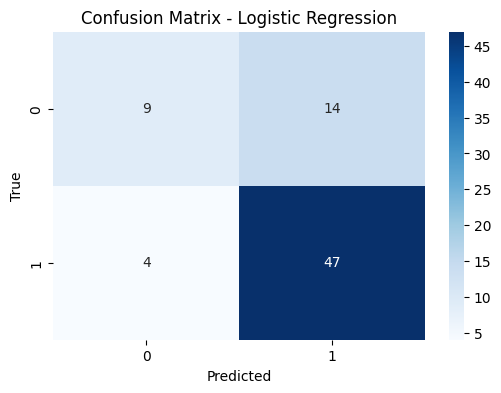


**Naive Bayes**
Accuracy: 0.7568
Precision: 0.7452
Recall: 0.7568
F1-score: 0.7453


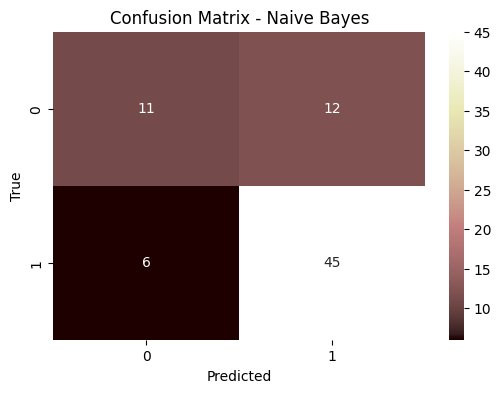


**KNN**
Accuracy: 0.8243
Precision: 0.8292
Recall: 0.8243
F1-score: 0.8101


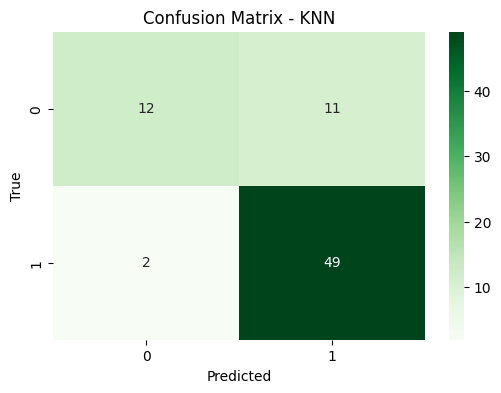


**Decision Tree**
Accuracy: 0.6351
Precision: 0.6672
Recall: 0.6351
F1-score: 0.6458


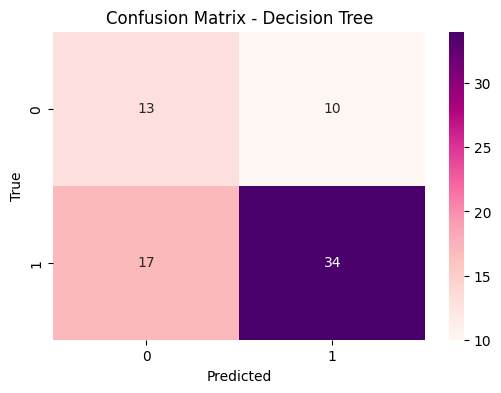


**SVM**
Accuracy: 0.7568
Precision: 0.7462
Recall: 0.7568
F1-score: 0.7338


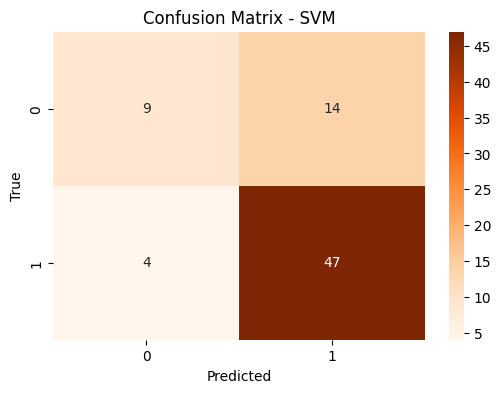


**Gradient Boosting**
Accuracy: 0.7432
Precision: 0.7314
Recall: 0.7432
F1-score: 0.7336


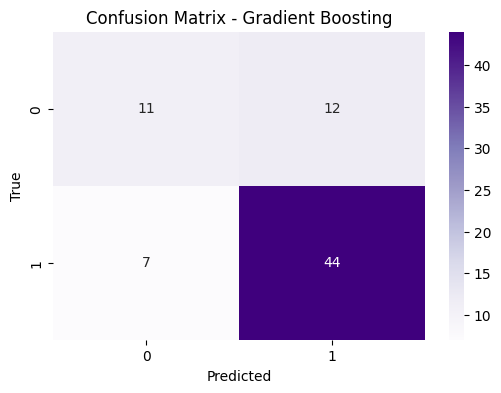

In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier



models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("Gradient Boosting", GradientBoostingClassifier()),
]

color_cycle = ['Blues', 'pink', 'Greens', 'RdPu', 'Oranges', 'Purples', 'YlGnBu']
color_index = 0

for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n**{model_name}**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=color_cycle[color_index % len(color_cycle)])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    color_index += 1



In [ ]:

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("Gradient Boosting", GradientBoostingClassifier())
]


for model_name, model in models:
  # Train the model
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)

  print(f"\n**{model_name}**")
  print(f"Accuracy: {accuracy:.4f}")


**Logistic Regression**
Accuracy: 0.7568

**Naive Bayes**
Accuracy: 0.7568

**KNN**
Accuracy: 0.8243

**Decision Tree**
Accuracy: 0.6892

**SVM**
Accuracy: 0.7568

**Gradient Boosting**
Accuracy: 0.7432


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


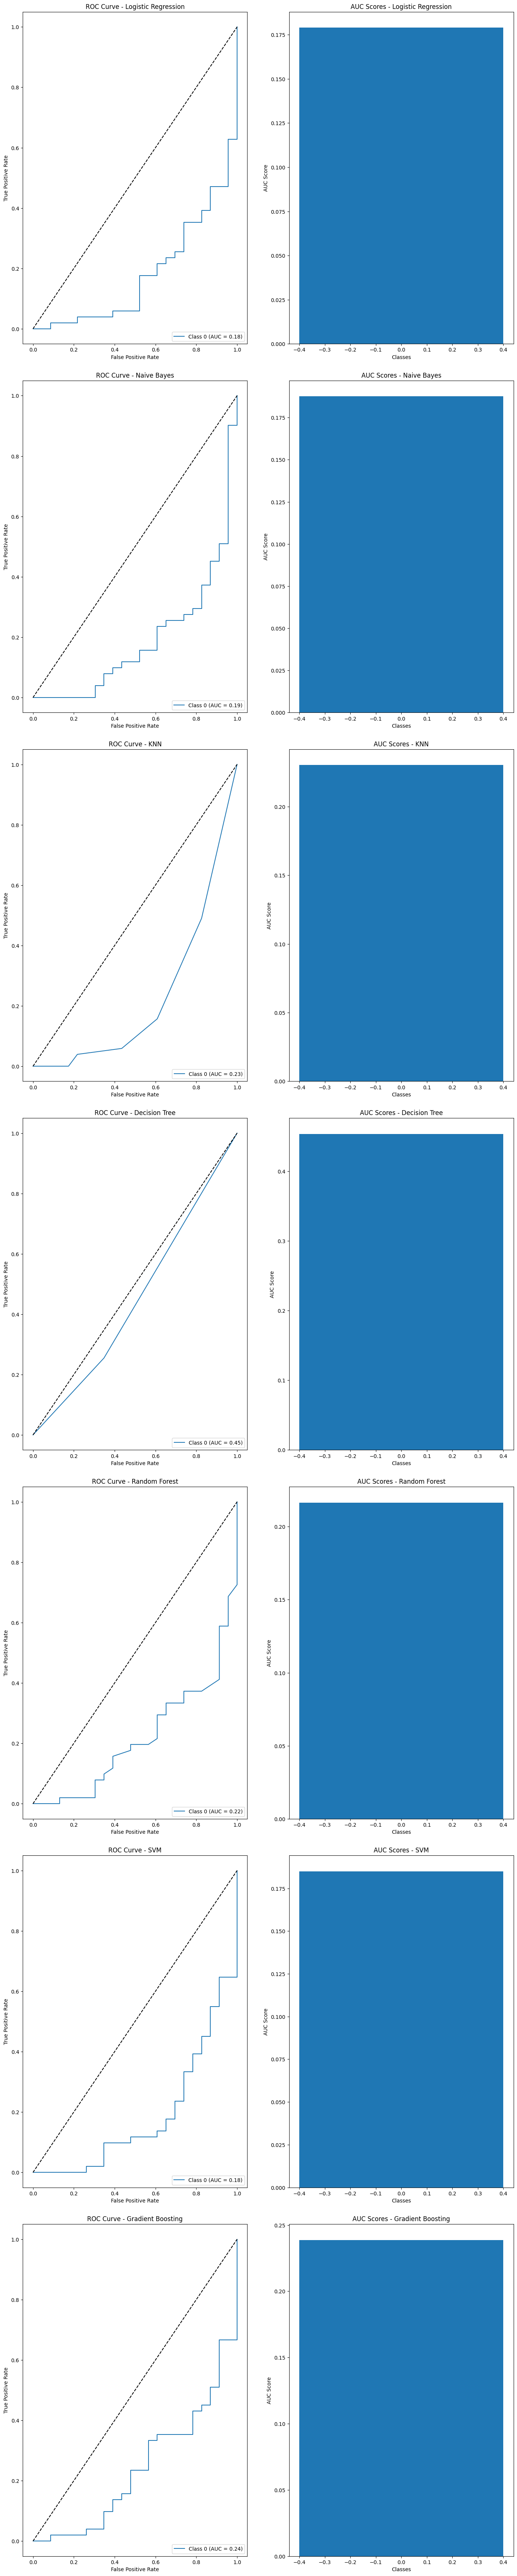

In [ ]:
# prompt: roc and auc curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC(probability=True)),  # Enable probability estimates for ROC curve
    ("Gradient Boosting", GradientBoostingClassifier())
]

# Binarize the labels for multi-class ROC curves
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

fig, axs = plt.subplots(len(models), 2, figsize=(15, 10 * len(models)))
fig.tight_layout(pad=5.0)

for i, (model_name, model) in enumerate(models):
  # Train the model
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)
  y_score = model.predict_proba(X_test)


  # ROC Curve
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for j in range(y_test_bin.shape[1]):
    fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_score[:, j])
    roc_auc[j] = auc(fpr[j], tpr[j])

  # Plot ROC curve for each class
  axs[i, 0].set_title(f"ROC Curve - {model_name}")
  for j in range(y_test_bin.shape[1]):
      axs[i, 0].plot(fpr[j], tpr[j], label=f'Class {j} (AUC = {roc_auc[j]:.2f})')
  axs[i, 0].plot([0, 1], [0, 1], 'k--')
  axs[i, 0].set_xlabel('False Positive Rate')
  axs[i, 0].set_ylabel('True Positive Rate')
  axs[i, 0].legend(loc="lower right")


  # AUC
  # Calculate AUC for each class
  auc_scores = [roc_auc[j] for j in range(y_test_bin.shape[1])]

  # Plot AUC scores
  axs[i, 1].set_title(f"AUC Scores - {model_name}")
  axs[i, 1].bar(range(len(auc_scores)), auc_scores)
  axs[i, 1].set_xlabel('Classes')
  axs[i, 1].set_ylabel('AUC Score')


plt.show()